In [29]:
import yt
import cPickle
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import brewer2mpl as brew
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from emission_functions import *

from radial_data_nozeros import *
from astropy.table import Table
from holoviews.operation.datashader import aggregate, datashade, dynspread, shade
from holoviews.operation import decimate
from holoviews.operation import histogram
import pandas as pd
import holoviews as hv

In [2]:
def get_refine_box(ds, zsnap, track):
    ## find closest output, modulo not updating before printout
    diff = track['col1'] - zsnap
    this_loc = track[np.where(diff == np.min(diff[np.where(diff > 1.e-6)]))]
    print "using this loc:", this_loc
    x_left = this_loc['col2'][0]
    y_left = this_loc['col3'][0]
    z_left = this_loc['col4'][0]
    x_right = this_loc['col5'][0]
    y_right = this_loc['col6'][0]
    z_right = this_loc['col7'][0]
    refine_box_center = [0.5*(x_left+x_right), 0.5*(y_left+y_right), 0.5*(z_left+z_right)]
    refine_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]
    refine_width = np.abs(x_right - x_left)
    return refine_box, refine_box_center, refine_width


In [3]:
baseREF = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2"
fnREF = baseREF+"/RD0020/RD0020"
baseNAT = "/Users/dalek/data/Molly/natural/nref11"
fnNAT = baseNAT+"/RD0020/RD0020"

track_name = baseREF+"/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')

In [4]:
dsREF = yt.load(fnREF)
dsNAT = yt.load(fnNAT)

rbR,rb_centerR,rb_widthR = get_refine_box(dsREF,dsREF.current_redshift,track)
rbN,rb_centerN,rb_widthN = get_refine_box(dsNAT,dsNAT.current_redshift,track)

yt : [INFO     ] 2018-01-08 17:13:35,360 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-01-08 17:13:35,361 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-01-08 17:13:35,363 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-01-08 17:13:35,364 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-01-08 17:13:35,365 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-01-08 17:13:35,365 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-01-08 17:13:35,366 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-01-08 17:13:35,367 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-01-08 17:13:35,368 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-01-08 17:13:35,389 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-01-08 17:13:35,390 Parameters: domain_dimensions         = [256 

using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.04999996364 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099   10
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99999996364 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169   10


In [22]:
densR = yt.ProjectionPlot(dsREF,'x','H_nuclei_density',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'))
#densR.set_cmap('H_nuclei_density','Blues_r')

yt : [INFO     ] 2018-01-04 15:39:23,496 Projection completed
yt : [INFO     ] 2018-01-04 15:39:23,497 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 15:39:23,501 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 15:39:23,504 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 15:39:23,507 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 15:39:23,519 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800



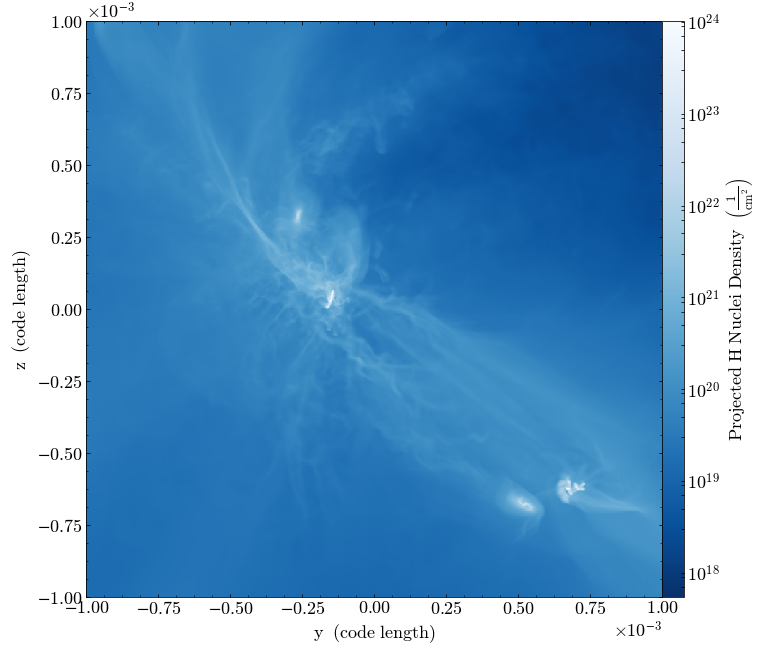

In [23]:
densR.set_cmap('H_nuclei_density','Blues_r')

yt : [INFO     ] 2018-01-04 15:40:20,207 Projection completed
yt : [INFO     ] 2018-01-04 15:40:20,208 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 15:40:20,209 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 15:40:20,211 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 15:40:20,212 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 15:40:20,214 Making a fixed resolution buffer of (('enzo', 'Temperature')) 800 by 800



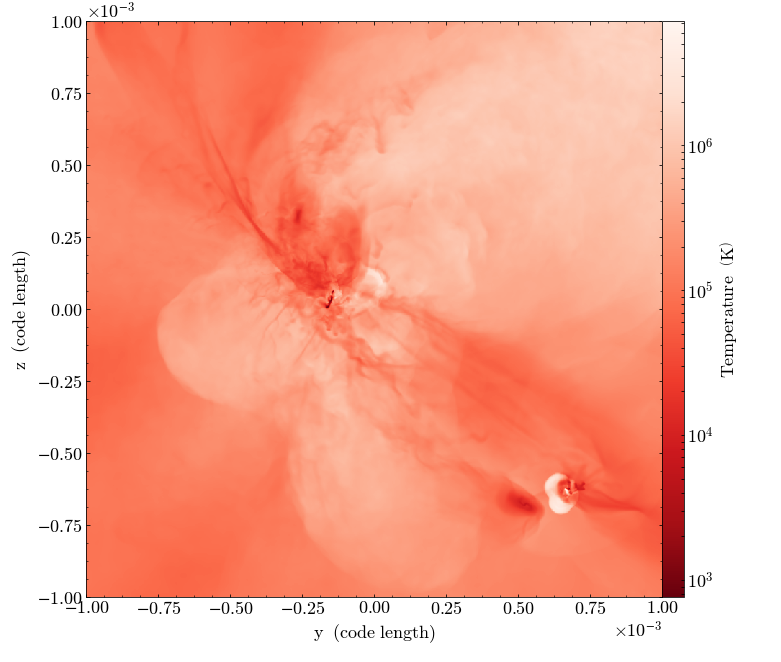

In [25]:
tempR = yt.ProjectionPlot(dsREF,'x','Temperature',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'),weight_field='Density')
tempR.set_cmap('Temperature','Reds_r')
tempR.show()

yt : [INFO     ] 2018-01-04 16:03:06,534 Projection completed
yt : [INFO     ] 2018-01-04 16:03:06,536 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 16:03:06,537 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 16:03:06,539 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-04 16:03:06,540 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-04 16:03:06,542 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



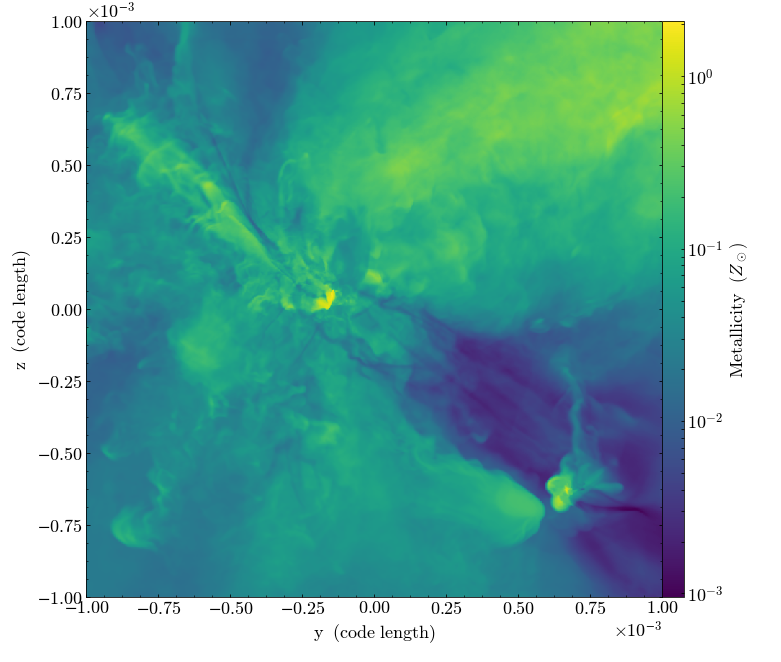

In [29]:
metalR = yt.ProjectionPlot(dsREF,'x','metallicity',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'),weight_field='Density')
metalR.set_cmap('metallicity','viridis')
metalR.show()

In [88]:
fontrc ={'fontname':'Osaka','fontsize':30}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(2,3)#,sharex=True,sharey=True)
fig.set_size_inches(20,12)

### Dens Ref ###
densR = yt.ProjectionPlot(dsREF,'x','H_nuclei_density',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'))
densR.set_zlim('H_nuclei_density',10**18,10**24)
frbDR = np.log10(densR.frb['H_nuclei_density'])


im = ax[0,0].imshow(frbDR,vmin=18.,vmax=24.,interpolation='none',cmap='Blues_r',origin='lower')
im.axes.set_xticks([])
im.axes.set_yticks([])
ax[0,0].text(0.95, 0.95, 'Density',
        verticalalignment='top', horizontalalignment='right',
        transform=ax[0,0].transAxes,
        color='white', fontsize=30)

### Temp Ref ###
tempR = yt.ProjectionPlot(dsREF,'x','temperature',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'),weight_field='Density')
tempR.set_zlim('temperature',10**3,10**7)
frbTR = np.log10(tempR.frb['temperature'])
im2 = ax[0,1].imshow(frbTR,vmin=3.,vmax=7.,interpolation='none',cmap='Reds_r',origin='lower')
im2.axes.set_xticks([])
im2.axes.set_yticks([])
ax[0,1].text(0.95, 0.95, 'Temperature',
        verticalalignment='top', horizontalalignment='right',
        transform=ax[0,1].transAxes,
        color='black', fontsize=30)

### Metal Ref ###
metalR = yt.ProjectionPlot(dsREF,'x','metallicity',data_source=rbR,center=rb_centerR,
                     width=(rb_widthR,'code_length'),weight_field='Density')
metalR.set_zlim('metallicity',10**-3,1.5)
frbZR = np.log10(metalR.frb['metallicity'])
im3 = ax[0,2].imshow(frbZR,vmin=-3.,vmax=0.18,interpolation='none',cmap='viridis',origin='lower')
im3.axes.set_xticks([])
im3.axes.set_yticks([])
ax[0,2].text(0.95, 0.95, 'Metallicity',
        verticalalignment='top', horizontalalignment='right',
        transform=ax[0,2].transAxes,
        color='white', fontsize=30)

## Dens Nat ###
densN = yt.ProjectionPlot(dsNAT,'x','H_nuclei_density',data_source=rbN,center=rb_centerN,
                     width=(rb_widthN,'code_length'))
densN.set_zlim('H_nuclei_density',10**18,10**24)
frbDN = np.log10(densN.frb['H_nuclei_density'])

im = ax[1,0].imshow(frbDN,vmin=18.,vmax=24.,interpolation='none',cmap='Blues_r',origin='lower')
im.axes.set_xticks([])
im.axes.set_yticks([])


## Temp Nat ###
tempN = yt.ProjectionPlot(dsNAT,'x','temperature',data_source=rbN,center=rb_centerN,
                     width=(rb_widthN,'code_length'),weight_field='Density')
tempN.set_zlim('temperature',10**3,10**7)
frbTN = np.log10(tempN.frb['temperature'])

im2 = ax[1,1].imshow(frbTN,vmin=3.,vmax=7.,interpolation='none',cmap='Reds_r',origin='lower')
im2.axes.set_xticks([])
im2.axes.set_yticks([])

### Metal Nat ###
metalN = yt.ProjectionPlot(dsNAT,'x','metallicity',data_source=rbN,center=rb_centerN,
                     width=(rb_widthN,'code_length'),weight_field='Density')
metalN.set_zlim('metallicity',10**-3,1.5)
frbZN = np.log10(metalN.frb['metallicity'])
im3 = ax[1,2].imshow(frbZN,vmin=-3.,vmax=0.18,interpolation='none',cmap='viridis',origin='lower')
im3.axes.set_xticks([])
im3.axes.set_yticks([])

plt.tight_layout()
fig.subplots_adjust(bottom=0.065)

cbaxes = fig.add_axes([0.038, 0.03, 0.273, 0.02])  ##-0.015
cb = plt.colorbar(im, cax = cbaxes,orientation='horizontal')  
axcb = cb.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='Osaka', size=20)
text.set_font_properties(font)

cbaxes2 = fig.add_axes([0.363, 0.03, 0.273, 0.02]) 
cb2 = plt.colorbar(im2, cax = cbaxes2,orientation='horizontal')
axcb = cb2.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='Osaka', size=20)
text.set_font_properties(font)

cbaxes3 = fig.add_axes([0.689, 0.03, 0.273, 0.02]) 
cb3 = plt.colorbar(im3, cax = cbaxes3,orientation='horizontal')
axcb = cb3.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='Osaka', size=20)
text.set_font_properties(font)


#plt.tight_layout()
plt.savefig('subplot_adjust_test.pdf')

yt : [INFO     ] 2018-01-05 00:24:43,707 Projection completed
yt : [INFO     ] 2018-01-05 00:24:43,709 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 00:24:43,710 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 00:24:43,712 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 00:24:43,714 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 00:24:43,720 Making a fixed resolution buffer of (('gas', 'H_nuclei_density')) 800 by 800
yt : [INFO     ] 2018-01-05 00:24:44,112 Making a fixed resolution buffer of (H_nuclei_density) 800 by 800
yt : [INFO     ] 2018-01-05 00:25:13,494 Projection completed
yt : [INFO     ] 2018-01-05 00:25:13,495 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 00:25:13,496 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 00:25:13,504 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 00:25:13,505 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 00:25:13,507 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO

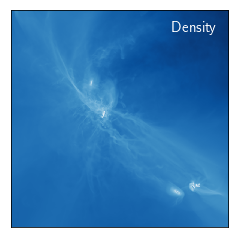

In [60]:
#fontrc ={'fontname':'Osaka','fontsize':30}
#mpl.rc('text', usetex=True)
       
fig,ax = plt.subplots(1,1)
im = ax.imshow(frbDR,vmin=18.,vmax=24.,interpolation='none',cmap='Blues_r',origin='lower')
im.axes.set_xticks([])
im.axes.set_yticks([])
ax.text(0.95, 0.95, 'Density',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=15,fontname='Arial')
plt.show()

In [64]:
help(fig.subplots_adjust)

Help on method subplots_adjust in module matplotlib.figure:

subplots_adjust(self, *args, **kwargs) method of matplotlib.figure.Figure instance
    Call signature::
    
      subplots_adjust(left=None, bottom=None, right=None, top=None,
                          wspace=None, hspace=None)
    
    Update the :class:`SubplotParams` with *kwargs* (defaulting to rc when
    *None*) and update the subplot locations



In [70]:
plt.close()

In [39]:
sl = yt.SlicePlot(dsREF,'x','Density',center=rb_centerR,width=(rb_widthR,'code_length'))
sl.annotate_grids(edgecolors='#8A2BE2',linewidth=1.5)
sl.set_cmap('Density','binary')
sl.set_zlim('Density',0.05,10**4)
sl.hide_axes()
sl.hide_colorbar()
sl.save('forcedAMR_AAS.pdf')

yt : [INFO     ] 2018-01-05 12:29:34,166 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 12:29:34,166 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 12:29:34,168 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-01-05 12:29:34,169 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-01-05 12:29:34,170 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800
yt : [INFO     ] 2018-01-05 12:29:35,131 Saving plot forcedAMR_AAS.pdf


['forcedAMR_AAS.pdf']

In [38]:
sl = yt.SlicePlot(dsNAT,'x','Density',center=rb_centerN,width=(rb_widthN,'code_length'))
sl.annotate_grids(edgecolors='#8A2BE2',linewidth=1.5)
sl.set_cmap('Density','binary')
sl.set_zlim('Density',0.05,10**4)
sl.hide_axes()
sl.hide_colorbar()
sl.save('naturalAMR_AAS.pdf')

yt : [INFO     ] 2018-01-05 12:29:29,583 xlim = 0.487924 0.489924
yt : [INFO     ] 2018-01-05 12:29:29,584 ylim = 0.501169 0.503169
yt : [INFO     ] 2018-01-05 12:29:29,586 xlim = 0.487924 0.489924
yt : [INFO     ] 2018-01-05 12:29:29,588 ylim = 0.501169 0.503169
yt : [INFO     ] 2018-01-05 12:29:29,591 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800
yt : [INFO     ] 2018-01-05 12:29:30,496 Saving plot naturalAMR_AAS.pdf


['naturalAMR_AAS.pdf']

In [11]:
val,pos = dsREF.find_max('dark_matter_density')

Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 17899.78it/s]
yt : [INFO     ] 2018-01-06 22:25:26,620 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-01-06 22:25:49,909 Max Value is 4.93084e-20 at 0.4940309524536133 0.4889726638793945 0.5021486282348633


yt : [INFO     ] 2018-01-06 22:26:35,753 Projection completed
yt : [INFO     ] 2018-01-06 22:26:35,755 xlim = 0.487973 0.489973
yt : [INFO     ] 2018-01-06 22:26:35,756 ylim = 0.501149 0.503149
yt : [INFO     ] 2018-01-06 22:26:35,757 xlim = 0.487973 0.489973
yt : [INFO     ] 2018-01-06 22:26:35,758 ylim = 0.501149 0.503149
yt : [INFO     ] 2018-01-06 22:26:35,760 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



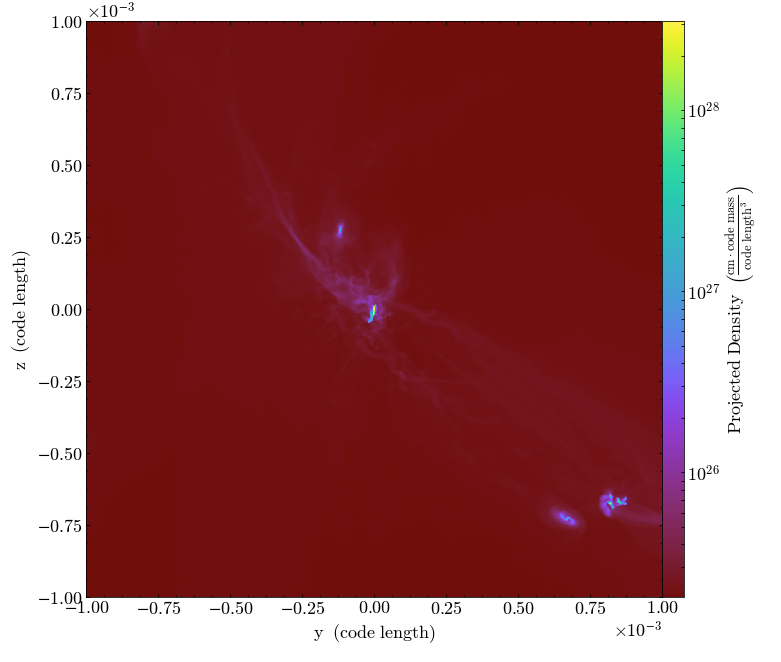

In [12]:
projtest = yt.ProjectionPlot(dsREF,'x','Density',center=pos,width=(rb_widthR,'code_length'))
projtest.show()

In [7]:
print dsREF.arr(rb_widthR,'code_length').in_units('kpc')

95.9232713685 kpc


In [9]:
print np.unique(rbR['dx'].in_units('pc'))

Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 20587.54it/s]
yt : [INFO     ] 2018-01-08 17:16:39,623 Gathering a field list (this may take a moment.)


[  91.47956025  182.9591205 ] pc



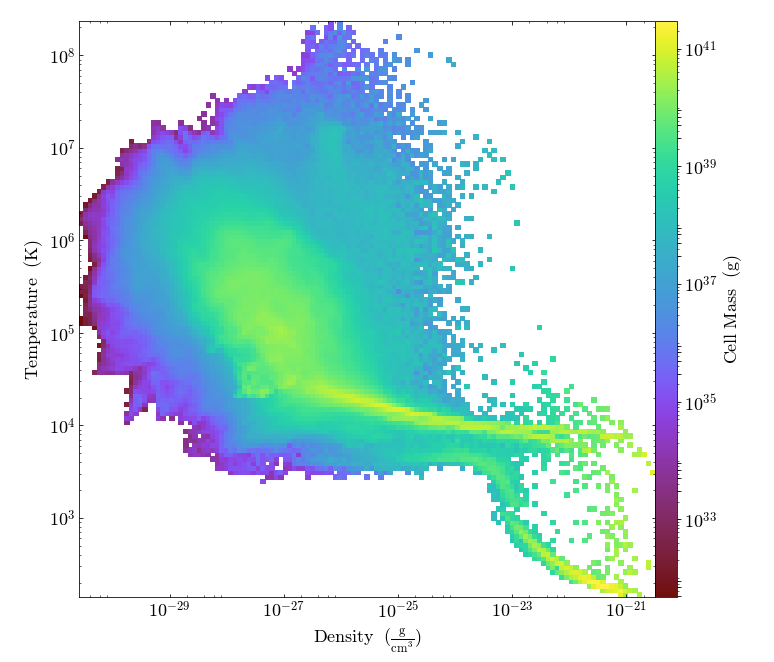

In [10]:
phaseplot = yt.PhasePlot(rbR, "density", "temperature", ["cell_mass"],
                    weight_field=None)
phaseplot.show()

/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10


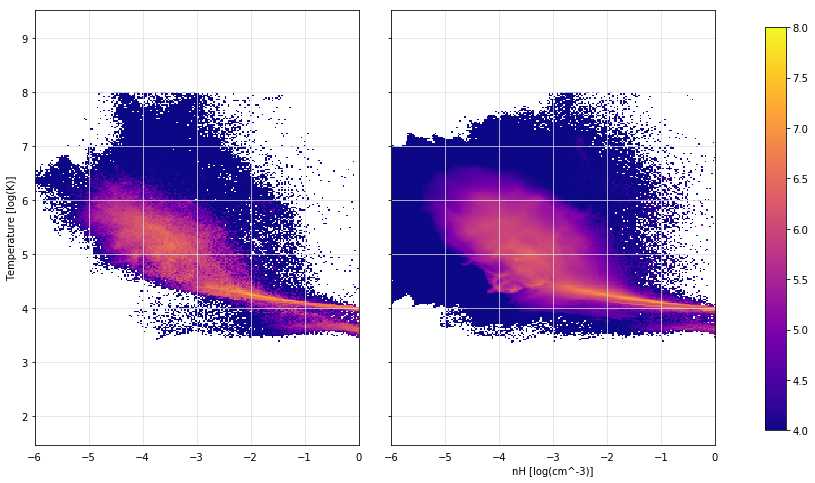

In [16]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax = ax.flatten()
fig.set_size_inches(14,8)
fig.subplots_adjust(hspace=0.1,wspace=0.1)
fig.subplots_adjust(right=0.8)

cellmassR = rbR['cell_mass'].in_units('Msun')
H, xedges, yedges = np.histogram2d(np.log10(rbR[('gas','H_nuclei_density')]),
                                   np.log10(rbR['Temperature']),
                                   bins=200.,range=[[-6,0],[3, 8]],weights=cellmassR) #,normed=True)

im = ax[1].imshow(np.log10(H.T),extent=[-6,0,3,8],interpolation='nearest',
                  origin='lower',cmap='plasma',vmin=4,vmax=8)

cellmassN = rbN['cell_mass'].in_units('Msun')
H, xedges, yedges = np.histogram2d(np.log10(rbN[('gas','H_nuclei_density')]),
                                   np.log10(rbN['Temperature']),
                                   bins=200.,range=[[-6,0],[3, 8]],weights=cellmassN) #,normed=True)

im = ax[0].imshow(np.log10(H.T),extent=[-6,0,3,8],interpolation='nearest',
                  origin='lower',cmap='plasma',vmin=4,vmax=8)

for i in range(2):
        ax[i].set_xlim([-6,0])
        ax[i].set_ylim([3,8])
        #ax[i].set_title(filenames[i].split('/')[-3])
        ax[i].grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.87')
        ax[i].grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.87',alpha=0.2)
        ax[i].grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.87')
        ax[i].grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.87',alpha=0.2)
        ax[i].tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='on')
        ax[i].tick_params(axis='y',which='both',bottom='off',top='off',labelbottom='off')

    
ax[0].set_ylabel('Temperature [log(K)]')
ax[1].set_xlabel('nH [log(cm^-3)]')
    #ax[0].set_xbound(lower=-6,upper=0)
    #ax[0].set_ybound(lower=3,upper=8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [23]:
## Let's start with some basic fields to put into the pandas dataframe
dens = np.log10(rbR['H_nuclei_density'])
temp = np.log10(rbR['Temperature'])
Zgas = np.log10(rbR['metallicity'])
x = rbR['x']
y = rbR['y']
z = rbR['z']

val,halo_centerR = dsREF.find_max('dark_matter_density')
halo_centerR = dsREF.arr(halo_centerR,'code_length')
dist = np.sqrt((halo_centerR[0]-rbR['x'])**2.+(halo_centerR[1]-rbR['y'])**2.+(halo_centerR[2]-rbR['z'])**2.).in_units('kpc')

df = pd.DataFrame({'temp':temp, 'dens':dens, 'Zgas':Zgas,
                   'x':x,'y':y,'z':z,'dist':dist})

## For the natural refinement
## Let's start with some basic fields to put into the pandas dataframe
dens2 = np.log10(rbN['H_nuclei_density'])
temp2 = np.log10(rbN['Temperature'])
Zgas2 = np.log10(rbN['metallicity'])
x2 = rbN['x']
y2 = rbN['y']
z2 = rbN['z']

val,halo_centerN = dsNAT.find_max('dark_matter_density')
halo_centerN = dsNAT.arr(halo_centerN,'code_length')
dist2 = np.sqrt((halo_centerN[0]-rbN['x'])**2.+(halo_centerN[1]-rbN['y'])**2.+(halo_centerN[2]-rbN['z'])**2.).in_units('kpc')

dfN = pd.DataFrame({'temp':temp2, 'dens':dens2, 'Zgas':Zgas2,
                    'x':x2,'y':y2,'z':z2,'dist':dist2})

yt : [INFO     ] 2018-01-08 18:34:45,873 Max Value is 4.93084e-20 at 0.4940309524536133 0.4889726638793945 0.5021486282348633
yt : [INFO     ] 2018-01-08 18:35:59,274 Max Value is 2.70932e-20 at 0.4940328598022461 0.4889516830444336 0.5021543502807617



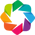

In [30]:
import holoviews as hv
import holoviews.util
hv.extension('bokeh')
#hv.extension('matplotlib')

import pandas as pd
import datashader as dshade
import matplotlib.cm as cm
import datashader as dshader


In [34]:
%%output size=150 filename='basic_dists_highz' fig='html'

temp_dist = hv.Scatter(df,kdims=['dist'],vdims=['temp'],label="Temperature")
dens_dist = hv.Scatter(df,kdims=['dist'],vdims=['dens'],label='Hydrogen Number Density')
metal_dist = hv.Scatter(df,kdims=['dist'],vdims=['Zgas'],label='Metallicity')
dist_plots = datashade(dens_dist,cmap=cm.Blues) + (datashade(temp_dist,cmap=cm.Reds) + datashade(metal_dist,cmap=cm.BuGn))

temp_dist2 = hv.Scatter(dfN,kdims=['dist'],vdims=['temp'],label="Temperature")
dens_dist2 = hv.Scatter(dfN,kdims=['dist'],vdims=['dens'],label='Hydrogen Number Density')
metal_dist2 = hv.Scatter(dfN,kdims=['dist'],vdims=['Zgas'],label='Metallicity')
dist_plots2 = datashade(dens_dist2,cmap=cm.Blues) + (datashade(temp_dist2,cmap=cm.Reds) +  datashade(metal_dist2,cmap=cm.BuGn))

dist_plots_all = dist_plots + dist_plots2

dist_plots_all.cols(3)
##gist_heat,gist_ocean

:Layout
   .DynamicMap.I   :DynamicMap   []
   .DynamicMap.II  :DynamicMap   []
   .DynamicMap.III :DynamicMap   []
   .DynamicMap.IV  :DynamicMap   []
   .DynamicMap.V   :DynamicMap   []
   .DynamicMap.VI  :DynamicMap   []

In [41]:
np.unique(rbN['dx'].in_units('kpc'))

YTArray([ 0.09147962,  0.18295925,  0.36591849,  0.73183699,  1.46367397,
        2.92734794,  5.85469588]) kpc

In [38]:
182.959246*2**5

5854.695872

In [40]:
2**5

32